<a href="https://colab.research.google.com/github/yesulmin/HandsOnDeeplearning/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTER3.분류
##MNIST

In [23]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [25]:
X, y = mnist['data'], mnist['target']

In [26]:
X.shape,  y.shape

((70000, 784), (70000,))

In [27]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(784,)


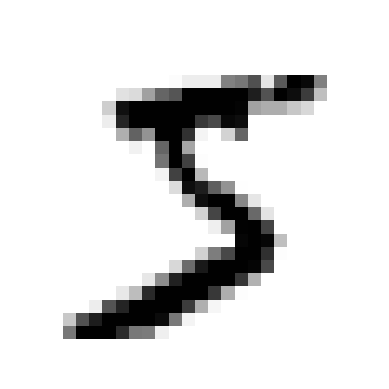

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(X[0].shape)
some_digit  = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [29]:
y[0]

'5'

In [30]:
import numpy as np
y  = y.astype(np.int8)

In [31]:
y[0]

5

In [34]:
x_train, x_test, y_train, y_test = X[:60000], X[60000: ], y[:60000], y[60000:]

In [35]:
x_train.shape

(60000, 784)

In [37]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [40]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=123)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=123)

In [41]:
sgd_clf.predict([some_digit])

array([ True])

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = x_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = x_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.96085
0.96615
0.96175


In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95505, 0.9018 , 0.9697 ])

In [47]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [48]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict
